In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import requests
from bs4 import BeautifulSoup

In [2]:
## observing timespan
years = []
for i in range(2012,2022):
    years.append(i)
    
years

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [3]:
df = pd.DataFrame({"years":years})

In [4]:
## evolution of tuition fee of BSc in Business Administration and Management programme at Corvinus University 2012-2021

fee = [295000,295000,350000,350000,350000,350000,350000,350000,390000,450000]

df["fee"] = fee

In [5]:
## using bs4 to get the inflation datas
r = requests.get("https://www.ksh.hu/docs/hun/xstadat/xstadat_eves/i_qsf001.html")

In [6]:
soup = BeautifulSoup(r.content, "html.parser")
table = soup.find("div", id="tbody")

In [7]:
rows = table.findAll("tr")[27:]

inf = [r.findAll("td")[8].get_text() for r in rows]

In [8]:
inf = [i.replace(",", ".") for i in inf]

In [9]:
## 2021 inflation
inf.append(105.1)

In [10]:
inf = [float(i) for i in inf]

In [11]:
# inflation accoriding to the prior year
inf

[105.7, 101.7, 99.8, 99.9, 100.4, 102.4, 102.8, 103.4, 103.3, 105.1]

In [12]:
# making a list of the real numbers of inflation
year_inf = []

# list of cumulated inflation rates in the analyzed timespan 
cum_inf = []
inf_sum = 0
for num in inf:
    if num > 100:
        num = num - 100
    else:
        num = -(100 - num)
    num = round(num, 2)
    
    year_inf.append(num)
    inf_sum += num
    
    cum_inf.append(round(inf_sum, 2))
 

In [13]:
df["inf_year"] = year_inf

In [14]:
df["cum_rates"] = cum_inf

In [15]:
df

,years,fee,inf_year,cum_rates
0,2012,295000,5.7,5.7
1,2013,295000,1.7,7.4
2,2014,350000,-0.2,7.2
3,2015,350000,-0.1,7.1
4,2016,350000,0.4,7.5
5,2017,350000,2.4,9.9
6,2018,350000,2.8,12.7
7,2019,350000,3.4,16.1
8,2020,390000,3.3,19.4
9,2021,450000,5.1,24.5


In [16]:
# nominal changes of the tuition fee in percentage form

fee_rate = [0]
sum_rate = 0
for i in range(0,9):
    if i == 0:
        fee_rate.append(0)
    elif 8 >= i and i > 0:
        if fee[i] < fee[i+1]:
            fee_num = ((fee[i+1] / fee[i]) - 1) * 100
            sum_rate += fee_num 
            fee_rate.append(round(sum_rate, 2))
        else:
            sum_rate += 0
            fee_rate.append(round(sum_rate, 2))
    else:
        fee_rate.append(round(sum_rate, 2))

In [17]:
fee_rate

[0, 0, 18.64, 18.64, 18.64, 18.64, 18.64, 18.64, 30.07, 45.46]

In [18]:
df["fee_increase_%"] = fee_rate

In [19]:
df = df[["years", "fee", "fee_increase_%", "inf_year", "cum_rates"]]

In [20]:
# inflated changes of the tuition fee
inf_fee = df["fee_increase_%"] + df["inf_year"]

In [21]:
# correcting the first value
inf_fee[0] = 0

In [22]:
df["inf_fee"] = inf_fee

<ipython-input-22-3dc597c987aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["inf_fee"] = inf_fee


In [23]:
df = df.set_index("years")

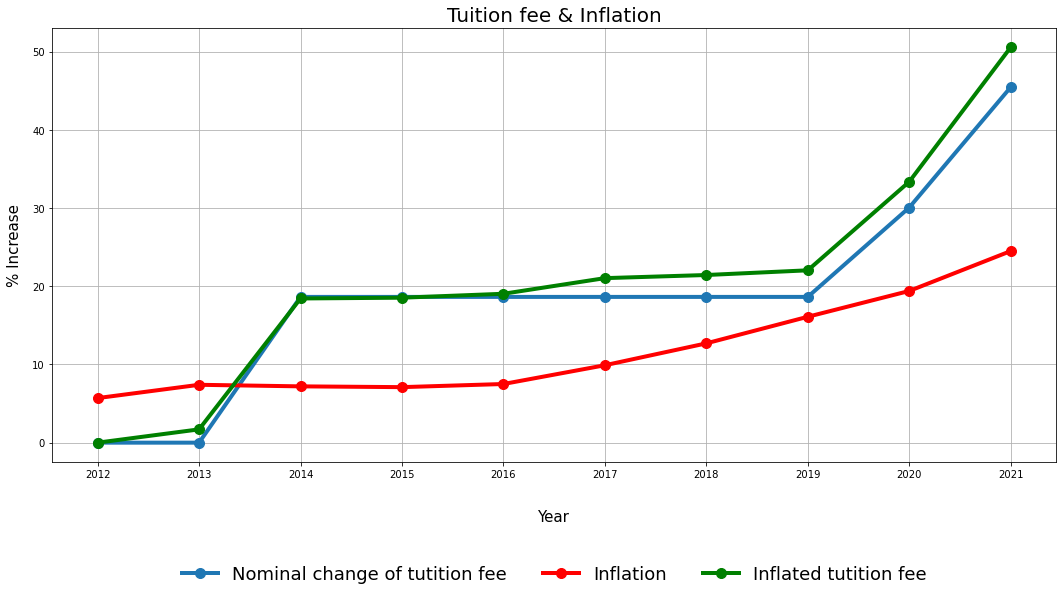

In [24]:
plt.figure(figsize=(18,8))
plt.xlabel("Year", labelpad=30, fontsize=15)
plt.ylabel("% Increase",labelpad=10, fontsize=15)
plt.grid(zorder=0)
plt.title("Tuition fee & Inflation", fontsize=20)
xticks = np.arange(2012,2022,1)
plt.xticks(xticks)

plt.plot(df.index, df["fee_increase_%"], marker="o", linewidth=4, markersize=10)
plt.plot(df.index, df["cum_rates"], marker="o" , color="r", linewidth=4, markersize=10)
plt.plot(df.index, df["inf_fee"], marker="o", color="g", linewidth=4, markersize=10)

plt.legend(['Nominal change of tutition fee','Inflation',"Inflated tutition fee" ], ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.2),\
                frameon=False, fontsize=18)

plt.show()

In [25]:
## scraping the evolution of the mean net income in Hungary

r2 = requests.get("https://www.ksh.hu/docs/hun/xstadat/xstadat_eves/i_qli042.html")

In [26]:
soup = BeautifulSoup(r2.content, "html.parser")
table = soup.find("div", id="tbody")

In [27]:
rows = table.findAll("tr")[20:]

In [28]:
salary = [r.findAll("td")[2].get_text() for r in rows]

In [29]:
salary

['144 085',
 '151 118',
 '155 690',
 '162 391',
 '175 009',
 '197 516',
 '219 412',
 '244 609',
 '268 405']

In [30]:
## 2021
salary.append("286 800")

In [31]:
salary = [int(s.replace(" ","")) for s in salary]

In [32]:
df["mean_net_salary"] = salary

In [34]:
## calculating the cumulated percentage changes of the net income

salary_rate = [0]
sum_rate = 0
for i in range(0,9):
    if 8 >= i and i >= 0:
        if salary[i] < salary[i+1]:
            salary_num = ((salary[i+1] / salary[i]) - 1) * 100
            sum_rate += salary_num 
            salary_rate.append(round(sum_rate, 2))
        else:
            sum_rate += 0
            salary_rate.append(round(sum_rate, 2))
    else:
        salary_rate.append(round(sum_rate, 2))

In [35]:
salary_rate

[0, 4.88, 7.91, 12.21, 19.98, 32.84, 43.93, 55.41, 65.14, 71.99]

In [36]:
## percentage income increase 
sal_rate = [0]
for i in range(0,10):
    if i > 0 and i <= 9:
        if salary[i] > salary[i-1]:
            sal_num = ((salary[i] / salary[i-1]) - 1) * 100
            sal_rate.append(round(sal_num, 2))
        else:
            sal_rate.append(0)
    else:
        None

In [38]:
sal_rate

[0, 4.88, 3.03, 4.3, 7.77, 12.86, 11.09, 11.48, 9.73, 6.85]

In [39]:
## income increase
df["salary_rate"] = sal_rate

In [40]:
## cumulated income increase
df["salary_cum_rate"] = salary_rate 

In [41]:
## getting the real wage
real_wage = df["salary_cum_rate"] - df["inf_year"]

In [42]:
real_wage[0] = 0

In [44]:
df["real_wage_rate"] = real_wage

In [45]:
df

,fee,fee_increase_%,inf_year,cum_rates,inf_fee,mean_net_salary,salary_rate,salary_cum_rate,real_wage_rate
years,,,,,,,,,
2012,295000,0.00,5.7,5.7,0.00,144085,0.00,0.00,-5.70
2013,295000,0.00,1.7,7.4,1.70,151118,4.88,4.88,3.18
2014,350000,18.64,-0.2,7.2,18.44,155690,3.03,7.91,8.11
2015,350000,18.64,-0.1,7.1,18.54,162391,4.30,12.21,12.31
2016,350000,18.64,0.4,7.5,19.04,175009,7.77,19.98,19.58
2017,350000,18.64,2.4,9.9,21.04,197516,12.86,32.84,30.44
2018,350000,18.64,2.8,12.7,21.44,219412,11.09,43.93,41.13
2019,350000,18.64,3.4,16.1,22.04,244609,11.48,55.41,52.01
2020,390000,30.07,3.3,19.4,33.37,268405,9.73,65.14,61.84


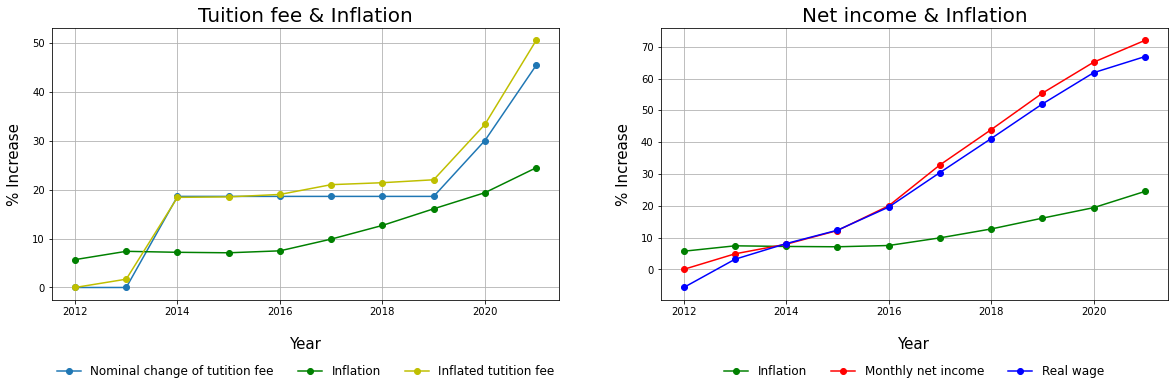

In [46]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(20,5)
ax[0].set_xlabel("Year", labelpad=20, fontsize=15)
ax[0].set_ylabel("% Increase",labelpad=10, fontsize=15)
ax[0].grid(zorder=0)
ax[0].set_title("Tuition fee & Inflation", fontsize=20)


ax[0].plot(df.index, df["fee_increase_%"], marker="o")
ax[0].plot(df.index, df["cum_rates"], marker="o" , color="g")
ax[0].plot(df.index, df["inf_fee"], marker="o", color="y")

ax[0].legend(['Nominal change of tutition fee','Inflation',"Inflated tutition fee" ], ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.2),\
                frameon=False, fontsize=12)

ax[1].set_xlabel("Year", labelpad=20, fontsize=15)
ax[1].set_ylabel("% Increase",labelpad=10, fontsize=15)
ax[1].grid(zorder=0)
ax[1].set_title("Net income & Inflation", fontsize=20)

ax[1].plot(df.index, df["cum_rates"], marker="o" , color="g")
ax[1].plot(df.index, df["salary_cum_rate"], marker="o" , color="r")
ax[1].plot(df.index, df["real_wage_rate"], marker="o" , color="b")

ax[1].legend(['Inflation',"Monthly net income","Real wage"], ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.2),\
                frameon=False, fontsize=12)

plt.show()

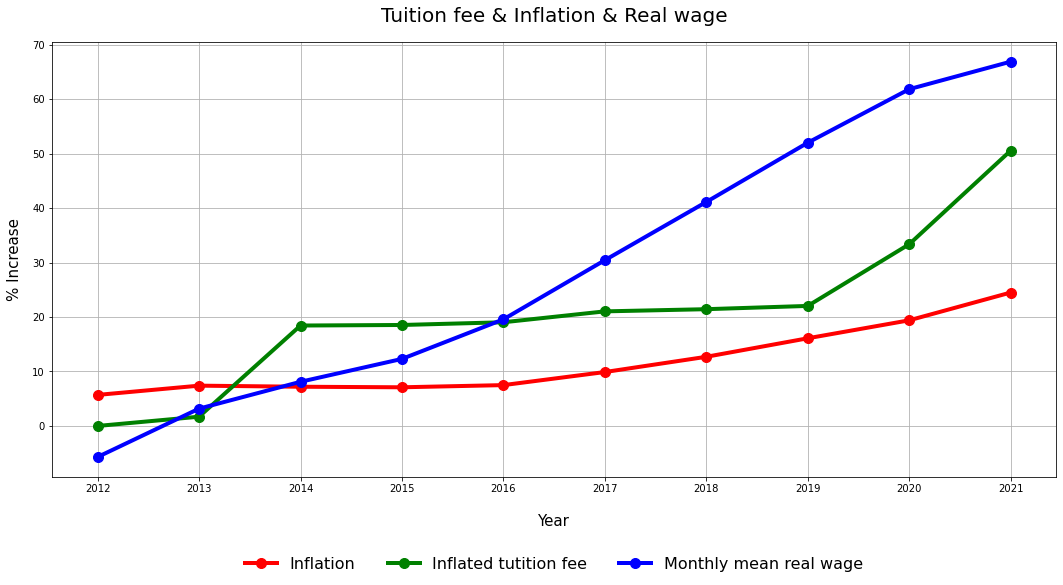

In [47]:
plt.figure(figsize=(18,8))

plt.xlabel("Year", labelpad=20, fontsize=15)
plt.ylabel("% Increase",labelpad=10, fontsize=15)
plt.grid(zorder=0)
plt.title("Tuition fee & Inflation & Real wage", fontsize=20, pad=20)
xticks = np.arange(2012,2022,1)
plt.xticks(xticks)

plt.plot(df.index, df["cum_rates"], marker="o" , color="r", linewidth=4, markersize=10)
plt.plot(df.index, df["inf_fee"], marker="o" , color="g", linewidth=4, markersize=10)
plt.plot(df.index, df["real_wage_rate"], marker="o" , color="b", linewidth=4, markersize=10)

plt.legend(['Inflation',"Inflated tutition fee","Monthly mean real wage"], ncol=5, loc='upper center',bbox_to_anchor=(0.5, -0.15),frameon=False,fontsize=16)

plt.show()